In [1]:
from pandasql import sqldf
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

# Overview

This notebook investigates housing prices across the United States at the county level to evaluate the key factors influencing price fluctuations. The aim is to identify the magnitude of influence that various socioeconomic factors have on housing prices through regression analysis.

The notebook is structured as follows:

Part 1: Data preparation. We clean and modify the raw data, including county-level housing prices, home internet coverage rates, education levels, racial diversity, population, population density, unemployment rates, median income and crime rate.

Part 2: Initial Data visualization. This section provides an naive visualization to highlight the relationships between housing prices and each factor. We use Matplotlib to plot housing prices against these factors.

Part 3: Regression analysis. We perform regression analysis on the dataset and report the results, interpreting the insights gained from the analysis.

## PART 1: Modify Existing Raw Data

### Data citation:

https://www.ers.usda.gov/data-products/county-level-data-sets/

https://techdatasociety.asu.edu/broadband-data-portal/dataaccess/countydata

https://www.openintro.org/data/?data=county_complete

https://www.kaggle.com/datasets/mikejohnsonjr/united-states-crime-rates-by-county

### (1) Housing Price Data

In [2]:
# Load the price data
Name_Price_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Price.csv")

Name_Price_r

,State,County Name,Median Home Price\nQ1 2022,Monthly Payment\nQ1 2022,Monthly Payment\nQ1 2021
0,Alabama,Autauga County,193870.0,810.0,600.0
1,Alabama,Baldwin County,314020.0,1320.0,990.0
2,Alabama,Barbour County,105120.0,440.0,330.0
3,Alabama,Bibb County,117160.0,490.0,370.0
4,Alabama,Blount County,164430.0,690.0,510.0
...,...,...,...,...,...
3111,Wyoming,Sweetwater County,250350.0,1050.0,770.0
3112,Wyoming,Teton County,1038520.0,4350.0,3210.0
3113,Wyoming,Uinta County,221670.0,930.0,690.0
3114,Wyoming,Washakie County,202500.0,850.0,630.0


In [3]:
Name_Price_r.columns

Index(['State', 'County Name', 'Median Home Price\nQ1 2022',
       'Monthly Payment\nQ1 2022', 'Monthly Payment\nQ1 2021'],
      dtype='object')

In [4]:
Name_Price = pd.DataFrame()

# Combine county and state into a single column
Name_Price["Name"] = Name_Price_r['County Name'].astype(str) + ", " + Name_Price_r['State'].astype(str)

# Rename column to "Price"
Name_Price["Price"] = Name_Price_r['Median Home Price\nQ1 2022']

Name_Price

,Name,Price
0,"Autauga County, Alabama",193870.0
1,"Baldwin County, Alabama",314020.0
2,"Barbour County, Alabama",105120.0
3,"Bibb County, Alabama",117160.0
4,"Blount County, Alabama",164430.0
...,...,...
3111,"Sweetwater County, Wyoming",250350.0
3112,"Teton County, Wyoming",1038520.0
3113,"Uinta County, Wyoming",221670.0
3114,"Washakie County, Wyoming",202500.0


In [5]:
## save it to modified_data
Name_Price.to_csv(r"C:\Users\siche\Desktop\projects\us_housing\modified_data\Price.csv")

### (2) Internet Coverage Rate Data

In [6]:
## Load the Internet data
Name_Internet_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Internet.csv")

Name_Internet_r

,statenam,county,year,id,broadband,cfips
0,Alabama,Autauga County,2000,0500000US01001,NaN,1001
1,Alabama,Autauga County,2001,0500000US01001,NaN,1001
2,Alabama,Autauga County,2002,0500000US01001,NaN,1001
3,Alabama,Autauga County,2003,0500000US01001,NaN,1001
4,Alabama,Autauga County,2004,0500000US01001,NaN,1001
...,...,...,...,...,...,...
59522,Wyoming,Weston County,2014,0500000US56045,NaN,56045
59523,Wyoming,Weston County,2015,0500000US56045,NaN,56045
59524,Wyoming,Weston County,2016,0500000US56045,NaN,56045
59525,Wyoming,Weston County,2017,0500000US56045,0.586207,56045


In [7]:
Name_Internet_r.columns

Index(['statenam', 'county', 'year', 'id', 'broadband', 'cfips'], dtype='object')

In [8]:
# Keep only the 2018 data since earlier years provide limited value due to incomplete records
Name_Internet_r = Name_Internet_r[Name_Internet_r.year == 2018]

# Reset the index to clean up the row order
Name_Internet_r = Name_Internet_r.reset_index(drop=True)

# Create a new dataframe to hold the modified data
Name_Internet = pd.DataFrame()

# Combine state and county into a single column
Name_Internet["Name"] = Name_Internet_r['county'].astype(str) + ", " + Name_Internet_r['statenam'].astype(str)

# Rename "broadband" to "Internet_coverage_rate" and convert to percentage
Name_Internet["Internet_coverage_rate"] = Name_Internet_r['broadband'].astype(float).mul(100)

Name_Internet

,Name,Internet_coverage_rate
0,"Autauga County, Alabama",78.899997
1,"Baldwin County, Alabama",78.099996
2,"Barbour County, Alabama",60.399997
3,"Bibb County, Alabama",66.100001
4,"Blount County, Alabama",68.500000
...,...,...
3128,"Sweetwater County, Wyoming",82.400006
3129,"Teton County, Wyoming",85.899997
3130,"Uinta County, Wyoming",88.200003
3131,"Washakie County, Wyoming",78.299993


In [9]:
## save it to modified_data
Name_Internet.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Internet_coverage_rate.csv')

### (3) Population Data

In [10]:
## Load the Population data
Name_Population_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Population.csv")

Name_Population_r

,Federal Information Processing Standards (FIPS) Code,State,Area name,Rural-Urban Continuum Code 2013,Population 1990,Population 2000,Population 2010,Population 2020,Population 2021
0,0,US,United States,NaN,248790925.0,281424600.0,308745538.0,331449281.0,331893745.0
1,1000,AL,Alabama,NaN,4040389.0,4447207.0,4779736.0,5024279.0,5039877.0
2,1001,AL,Autauga County,2.0,34222.0,43751.0,54571.0,58805.0,59095.0
3,1003,AL,Baldwin County,3.0,98280.0,140416.0,182265.0,231767.0,239294.0
4,1005,AL,Barbour County,6.0,25417.0,29042.0,27457.0,25223.0,24964.0
...,...,...,...,...,...,...,...,...,...
3196,56037,WY,Sweetwater County,5.0,38823.0,37620.0,43806.0,42272.0,41614.0
3197,56039,WY,Teton County,7.0,11173.0,18257.0,21294.0,23331.0,23575.0
3198,56041,WY,Uinta County,7.0,18705.0,19745.0,21118.0,20450.0,20635.0
3199,56043,WY,Washakie County,7.0,8388.0,8292.0,8533.0,7685.0,7705.0


In [11]:
Name_Population_r.columns

Index(['Federal Information Processing Standards (FIPS) Code', 'State',
       'Area name', 'Rural-Urban Continuum Code 2013', 'Population 1990',
       'Population 2000', 'Population 2010', 'Population 2020',
       'Population 2021'],
      dtype='object')

In [12]:
# Standardize state names by converting state abbreviations to full names using a predefined dictionary
State_Converter = {'AL':'Alabama', 'AK':'Alaska', 'AZ':'Arizona', 'AR':'Arkansas', 'CA':'California', 'CO':'Colorado', 'CT':'Connecticut', 'DE':'Delaware',
                   'DC':'District of Columbia', 'FL':'Florida', 'GA':'Georgia', 'HI':'Hawaii', 'ID':'Idaho', 'IL':'Illinois', 'IN':'Indiana', 'IA':'Iowa',
                   'KS':'Kansas', 'KY':'Kentucky', 'LA':'Louisiana', 'ME':'Maine', 'MD':'Maryland', 'MA':'Massachusetts', 'MI':'Michigan', 'MN':'Minnesota',
                   'MS':'Mississippi', 'MO':'Missouri', 'MT':'Montana', 'NE':'Nebraska', 'NV':'Nevada', 'NH':'New Hampshire', 'NJ':'New Jersey', 'NM':'New Mexico',
                   'NY':'New York', 'NC':'North Carolina', 'ND':'North Dakota', 'OH':'Ohio', 'OK':'Oklahoma', 'OR':'Oregon', 'PA':'Pennsylvania',
                   'RI':'Rhode Island', 'SC':'South Carolina', 'SD':'South Dakota', 'TN':'Tennessee', 'TX':'Texas', 'UT':'Utah', 'VT':'Vermont', 'VA':'Virginia',
                   'WA':'Washington', 'WV':'West Virginia', 'WI':'Wisconsin', 'WY':'Wyoming'}

Name_Population_r['State'] = Name_Population_r['State'].replace(State_Converter)

# Create a new dataframe for the modified population data
Name_Population = pd.DataFrame()

# Specify the state for each district to handle counties with the same name in different states
Name_Population["Name"] = Name_Population_r['Area name'].astype(str) + ", " + Name_Population_r['State'].astype(str)

# Rename "Population 2021" to "Population"
Name_Population["Population"] = Name_Population_r['Population 2021']

Name_Population

,Name,Population
0,"United States, US",331893745.0
1,"Alabama, Alabama",5039877.0
2,"Autauga County, Alabama",59095.0
3,"Baldwin County, Alabama",239294.0
4,"Barbour County, Alabama",24964.0
...,...,...
3196,"Sweetwater County, Wyoming",41614.0
3197,"Teton County, Wyoming",23575.0
3198,"Uinta County, Wyoming",20635.0
3199,"Washakie County, Wyoming",7705.0


In [13]:
## save it to modified_data
Name_Population.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Population.csv')

### (4) Population Density Data

In [14]:
## load the Density data
Name_Density_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Density.csv")

Name_Density_r

,OBJECTID,COUNTYNS,GEOID,ALAND,AWATER,NAME,State,B25010_001E,B25010_001M,B25010_002E,...,B01001_001E,B01001_001M,B01001_calc_PopDensity,created_user,created_date,last_edited_user,last_edited_date,B01001_calc_PopDensityM,SHAPE_Length,SHAPE_Area
0,1,161526,1001,1539602123,25706961,Autauga County,Alabama,2.59,0.05,2.59,...,55200,NaN,35.853419,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.066037,0.150256
1,2,161527,1003,4117546676,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,...,208107,NaN,50.541504,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,4.483746,0.409904
2,3,161528,1005,2292144655,50538698,Barbour County,Alabama,2.49,0.07,2.44,...,25782,NaN,11.247981,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.695262,0.223270
3,4,161529,1007,1612167481,9602089,Bibb County,Alabama,2.99,0.14,3.05,...,22527,NaN,13.973114,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,1.887514,0.156473
4,5,161530,1009,1670103911,15015423,Blount County,Alabama,2.77,0.05,2.85,...,57645,NaN,34.515816,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.423552,0.164405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,3216,1804553,72145,118777649,57795019,Vega Baja Municipio,Puerto Rico,2.93,0.09,2.93,...,53371,NaN,449.335380,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,0.485650,0.010381
3216,3217,1804554,72147,131541395,552192819,Vieques Municipio,Puerto Rico,3.55,0.38,3.03,...,8771,NaN,66.678630,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,0.675819,0.012181
3217,3218,1804555,72149,92298569,3622639,Villalba Municipio,Puerto Rico,2.96,0.10,3.09,...,22993,NaN,249.115455,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,0.431598,0.008189
3218,3219,1804556,72151,143005179,72592521,Yabucoa Municipio,Puerto Rico,2.91,0.10,2.90,...,34149,NaN,238.795547,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,0.676628,0.012229


In [15]:
Name_Density_r.columns

Index(['OBJECTID', 'COUNTYNS', 'GEOID', 'ALAND', 'AWATER', 'NAME', 'State',
       'B25010_001E', 'B25010_001M', 'B25010_002E', 'B25010_002M',
       'B25010_003E', 'B25010_003M', 'B01001_001E', 'B01001_001M',
       'B01001_calc_PopDensity', 'created_user', 'created_date',
       'last_edited_user', 'last_edited_date', 'B01001_calc_PopDensityM',
       'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

In [16]:
## We create a new dataframe to hold the modified data:
Name_Density = pd.DataFrame()

## Rename to align with other datasets:
Name_Density["Name"] = Name_Density_r['NAME'].astype(str) +", "+ Name_Density_r['State'].astype(str)
Name_Density["Density"] = Name_Density_r["B01001_calc_PopDensity"]

Name_Density

,Name,Density
0,"Autauga County, Alabama",35.853419
1,"Baldwin County, Alabama",50.541504
2,"Barbour County, Alabama",11.247981
3,"Bibb County, Alabama",13.973114
4,"Blount County, Alabama",34.515816
...,...,...
3215,"Vega Baja Municipio, Puerto Rico",449.335380
3216,"Vieques Municipio, Puerto Rico",66.678630
3217,"Villalba Municipio, Puerto Rico",249.115455
3218,"Yabucoa Municipio, Puerto Rico",238.795547


In [17]:
## save it to modified_data
Name_Density.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Density.csv')

### (5) Education Data

In [18]:
## load the Education data
Name_Education_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Education.csv")

Name_Education_r

,Federal Information Processing Standard (FIPS) Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults with a bachelor's degree or higher 2007-11,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20","Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2015-19,Unnamed: 55
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,28.2,"25,562,680","59,421,419","64,496,416","73,356,319",11.5,26.7,28.9,32.9,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,22.0,"438,947","1,014,342","1,013,673","877,044",13.1,30.3,30.3,26.2,NaN
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,21.6,"4,273","11,880","10,986","10,721",11.3,31.4,29.0,28.3,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,27.2,"14,823","42,272","48,832","49,636",9.5,27.2,31.4,31.9,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,13.9,"4,497","6,361","4,872","2,067",25.3,35.7,27.4,11.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,17.4,"9,683","10,459","8,550","7,948",26.4,28.5,23.3,21.7,NaN
3281,72147,PR,Vieques Municipio,7.0,12.0,7.0,12.0,NaN,NaN,NaN,...,13.7,"1,755","2,726",735,782,29.3,45.4,12.3,13.0,NaN
3282,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,14.2,"3,240","5,624","3,210","2,970",21.5,37.4,21.3,19.7,NaN
3283,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,13.8,"6,678","6,140","6,728","4,186",28.1,25.9,28.3,17.6,NaN


In [19]:
Name_Education_r.columns

Index(['Federal Information Processing Standard (FIPS) Code', 'State',
       'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Per

In [20]:
# Standardize state names using the State_Converter dictionary
Name_Education_r['State'] = Name_Education_r['State'].replace(State_Converter)

# Remove rows with state "PR" since data for this state is not present in other datasets
Name_Education_r = Name_Education_r[Name_Education_r['State'] != 'PR']

# Create a new dataframe for the modified education data
Name_Education = pd.DataFrame()

# Specify the state for each county to handle counties with the same name in different states
Name_Education["Name"] = Name_Education_r['Area name'].astype(str) + ", " + Name_Education_r['State'].astype(str)

# Keep percentage columns and rename them for clarity
Name_Education['College_or_above_percentage'] = Name_Education_r["Percent of adults with a bachelor's degree or higher 2015-19"]
Name_Education['Some_college_percentage'] = Name_Education_r["Percent of adults completing some college or associate's degree, 2016-20"]
Name_Education['Highschool_percentage'] = Name_Education_r['Percent of adults with a high school diploma only, 2016-20']
Name_Education['No_highschool_percentage'] = Name_Education_r['Percent of adults with less than a high school diploma, 2016-20']

Name_Education

,Name,College_or_above_percentage,Some_college_percentage,Highschool_percentage,No_highschool_percentage
0,"United States, US",32.9,28.9,26.7,11.5
1,"Alabama, Alabama",26.2,30.3,30.3,13.1
2,"Autauga County, Alabama",28.3,29.0,31.4,11.3
3,"Baldwin County, Alabama",31.9,31.4,27.2,9.5
4,"Barbour County, Alabama",11.6,27.4,35.7,25.3
...,...,...,...,...,...
3201,"Sweetwater County, Wyoming",21.2,39.1,32.3,7.4
3202,"Teton County, Wyoming",55.1,24.0,15.6,5.3
3203,"Uinta County, Wyoming",19.1,36.3,37.7,6.9
3204,"Washakie County, Wyoming",23.8,39.4,28.8,8.0


In [21]:
## save it to modified_data
Name_Education.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Education.csv')

### (6) Diversity Data

In [22]:
## Load the Races data
Name_Races = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Races.csv")
Name_Races

,Geography,Name,Caucasian Rate,African American Rate,Asian Rate,American Indian& Alaska Native Rate,other rate
0,0500000US01001,"Autauga County, Alabama",0.7170,0.1946,0.0150,0.0037,0.0698
1,0500000US01003,"Baldwin County, Alabama",0.8172,0.0786,0.0089,0.0068,0.0885
2,0500000US01005,"Barbour County, Alabama",0.4487,0.4731,0.0046,0.0046,0.0690
3,0500000US01007,"Bibb County, Alabama",0.7426,0.1980,0.0014,0.0027,0.0553
4,0500000US01009,"Blount County, Alabama",0.8568,0.0143,0.0030,0.0057,0.1203
...,...,...,...,...,...,...,...
3216,0500000US72145,"Vega Baja Municipio, Puerto Rico",0.1846,0.0642,0.0005,0.0085,0.7423
3217,0500000US72147,"Vieques Municipio, Puerto Rico",0.1880,0.1523,0.0009,0.0104,0.6484
3218,0500000US72149,"Villalba Municipio, Puerto Rico",0.1552,0.0625,0.0005,0.0059,0.7760
3219,0500000US72151,"Yabucoa Municipio, Puerto Rico",0.1653,0.0967,0.0003,0.0065,0.7313


In [23]:
# The original dataset, Raecs, did not include rates in the last four columns.
# The rates were calculated using Excel for efficiency instead of using Python.
Name_Races.columns

Index(['Geography', 'Name', 'Caucasian Rate', 'African American Rate',
       'Asian Rate', 'American Indian& Alaska Native Rate', 'other rate'],
      dtype='object')

In [24]:
# Drop the unnecessary "Geography" column
Name_Races = Name_Races.drop(columns=['Geography'])

# Drop the "other rate" column since it is correlated with the other columns and won't be used for regression
Name_Races = Name_Races.drop(columns=['other rate'])

# Rename columns for clarity
Name_Races.rename(columns={ 
    'Caucasian Rate': 'White_percentage',
    'African American Rate': 'African_percentage',
    'Asian Rate': 'Asian_percentage',
    'American Indian& Alaska Native Rate': 'Native_percentage'
}, inplace=True)

# Convert rates to percentages
Name_Races['White_percentage'] = Name_Races['White_percentage'].mul(100)
Name_Races['African_percentage'] = Name_Races['African_percentage'].mul(100)
Name_Races['Asian_percentage'] = Name_Races['Asian_percentage'].mul(100)
Name_Races['Native_percentage'] = Name_Races['Native_percentage'].mul(100)

Name_Races


,Name,White_percentage,African_percentage,Asian_percentage,Native_percentage
0,"Autauga County, Alabama",71.70,19.46,1.50,0.37
1,"Baldwin County, Alabama",81.72,7.86,0.89,0.68
2,"Barbour County, Alabama",44.87,47.31,0.46,0.46
3,"Bibb County, Alabama",74.26,19.80,0.14,0.27
4,"Blount County, Alabama",85.68,1.43,0.30,0.57
...,...,...,...,...,...
3216,"Vega Baja Municipio, Puerto Rico",18.46,6.42,0.05,0.85
3217,"Vieques Municipio, Puerto Rico",18.80,15.23,0.09,1.04
3218,"Villalba Municipio, Puerto Rico",15.52,6.25,0.05,0.59
3219,"Yabucoa Municipio, Puerto Rico",16.53,9.67,0.03,0.65


In [25]:
## save it to modified_data
Name_Races.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Races.csv')

### (7) Unemployment & Income Data

In [26]:
## We do them together because they are in the same dataset.
## Load the Unemployment_Income data
Name_Unemployment_Income_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Unemployment_Income.csv")
Name_Unemployment_Income_r

,FIPS_code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,0,US,United States,NaN,NaN,NaN,"142,601,576","136,904,853","5,696,723",4.0,...,"161,207,103","148,183,367","13,023,736",8.1,"161,758,337","153,099,687","8,658,650",5.4,67340.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,147,173","2,047,731","99,442",4.6,...,"2,268,309","2,121,149","147,160",6.5,"2,246,993","2,169,721","77,272",3.4,53958.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,861","20,971",890,4.1,...,"26,405","24,985","1,420",5.4,"26,341","25,599",742,2.8,67565.0,125.2
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"69,979","67,370","2,609",3.7,...,"98,910","92,751","6,159",6.2,"99,427","96,481","2,946",3.0,71135.0,131.8
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"11,449","10,812",637,5.6,...,"8,680","8,004",676,7.8,"8,197","7,728",469,5.7,38866.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,72145,PR,"Vega Baja Municipio, PR",1.0,1.0,1.0,"19,805","17,607","2,198",11.1,...,NaN,NaN,NaN,NaN,"14,185","12,742","1,443",10.2,NaN,NaN
3273,72147,PR,"Vieques Municipio, PR",7.0,12.0,0.0,"2,441","2,120",321,13.2,...,NaN,NaN,NaN,NaN,"2,775","2,435",340,12.3,NaN,NaN
3274,72149,PR,"Villalba Municipio, PR",2.0,2.0,1.0,"7,636","6,648",988,12.9,...,NaN,NaN,NaN,NaN,"7,700","6,807",893,11.6,NaN,NaN
3275,72151,PR,"Yabucoa Municipio, PR",1.0,1.0,1.0,"10,613","9,005","1,608",15.2,...,NaN,NaN,NaN,NaN,"9,164","8,217",947,10.3,NaN,NaN


In [27]:
Name_Unemployment_Income_r.columns

Index(['FIPS_code', 'State', 'Area_name', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013', 'Civilian_labor_force_2000',
       'Employed_2000', 'Unemployed_2000', 'Unemployment_rate_2000',
       'Civilian_labor_force_2001', 'Employed_2001', 'Unemployed_2001',
       'Unemployment_rate_2001', 'Civilian_labor_force_2002', 'Employed_2002',
       'Unemployed_2002', 'Unemployment_rate_2002',
       'Civilian_labor_force_2003', 'Employed_2003', 'Unemployed_2003',
       'Unemployment_rate_2003', 'Civilian_labor_force_2004', 'Employed_2004',
       'Unemployed_2004', 'Unemployment_rate_2004',
       'Civilian_labor_force_2005', 'Employed_2005', 'Unemployed_2005',
       'Unemployment_rate_2005', 'Civilian_labor_force_2006', 'Employed_2006',
       'Unemployed_2006', 'Unemployment_rate_2006',
       'Civilian_labor_force_2007', 'Employed_2007', 'Unemployed_2007',
       'Unemployment_rate_2007', 'Civilian_labor_force_2008', 'Employed_2008',
       'Unemplo

In [28]:
# Remove rows with the state "PR" since data for this state is not present in other datasets
Name_Unemployment_Income_r = Name_Unemployment_Income_r[Name_Unemployment_Income_r['State'] != 'PR']

# Create new dataframes to hold the modified unemployment and income data
Name_Unemployment = pd.DataFrame()
Name_Income = pd.DataFrame()

# Standardize state names by converting abbreviations to full names using the State_Converter
Name_Unemployment['Name'] = Name_Unemployment_Income_r['Area_name'].replace(State_Converter, regex=True)
Name_Income['Name'] = Name_Unemployment_Income_r['Area_name'].replace(State_Converter, regex=True)

# Rename columns for clarity: 'Unemployment_rate_2021' to 'Unemployment_rate' and 'Median_Household_Income_2020' to 'Income'
Name_Unemployment['Unemployment_rate'] = Name_Unemployment_Income_r['Unemployment_rate_2021']
Name_Income['Income'] = Name_Unemployment_Income_r['Median_Household_Income_2020']

Name_Unemployment

,Name,Unemployment_rate
0,United States,5.4
1,Alabama,3.4
2,"Autauga County, Alabama",2.8
3,"Baldwin County, Alabama",3.0
4,"Barbour County, Alabama",5.7
...,...,...
3193,"Sweetwater County, Wyoming",5.6
3194,"Teton County, Wyoming",3.2
3195,"Uinta County, Wyoming",5.0
3196,"Washakie County, Wyoming",4.0


In [29]:
Name_Income

,Name,Income
0,United States,67340.0
1,Alabama,53958.0
2,"Autauga County, Alabama",67565.0
3,"Baldwin County, Alabama",71135.0
4,"Barbour County, Alabama",38866.0
...,...,...
3193,"Sweetwater County, Wyoming",70583.0
3194,"Teton County, Wyoming",92488.0
3195,"Uinta County, Wyoming",71246.0
3196,"Washakie County, Wyoming",58532.0


In [30]:
## save them to modified_data
Name_Unemployment.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Unemployment_rate.csv')
Name_Income.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Income.csv')

### (8) Median Age Data

In [31]:
# Load the Age data
County_Complete = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Age.csv")

In [32]:
County_Complete.columns

Index(['fips', 'state', 'name', 'pop2000', 'pop2010', 'pop2011', 'pop2012',
       'pop2013', 'pop2014', 'pop2015',
       ...
       'poverty_under_18_2019', 'two_plus_races_2019',
       'unemployment_rate_2019', 'uninsured_2019',
       'uninsured_65_and_older_2019', 'uninsured_under_19_2019',
       'uninsured_under_6_2019', 'veterans_2019', 'white_2019',
       'white_not_hispanic_2019'],
      dtype='object', length=188)

In [33]:
# Create a new dataframe to hold the modified age data
Name_Age = pd.DataFrame()

# Standardize state names by converting abbreviations to full names using the State_Converter
Name_Age['Name'] = County_Complete['name'].astype(str) + ", " + County_Complete['state'].astype(str)

# Store the median age information in the new dataframe
Name_Age['Median_age'] = County_Complete['median_age_2019']

Name_Age

,Name,Median_age
0,"Autauga County, Alabama",38.2
1,"Baldwin County, Alabama",43.0
2,"Barbour County, Alabama",40.4
3,"Bibb County, Alabama",40.9
4,"Blount County, Alabama",40.7
...,...,...
3137,"Sweetwater County, Wyoming",35.3
3138,"Teton County, Wyoming",39.3
3139,"Uinta County, Wyoming",35.8
3140,"Washakie County, Wyoming",42.9


In [34]:
## save them to modified_data
Name_Age.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Age.csv')

### (9) Crime Data

In [35]:
# Load the Crime data
Name_Crime_r = pd.read_csv(r"C:\Users\siche\Desktop\projects\us_housing\data\Crime.csv")
Name_Crime_r

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25


In [36]:
Name_Crime_r.columns

Index(['county_name', 'crime_rate_per_100000', 'index', 'EDITION', 'PART',
       'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX',
       'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [37]:
# Split the 'Name' column into 'City' and 'State' using a comma as the delimiter
Name_Crime_r[['County', 'State']] = Name_Crime_r['county_name'].str.split(', ', expand=True)

# Standardize state names using the State_Converter dictionary
Name_Crime_r['State'] = Name_Crime_r['State'].replace(State_Converter)
Name_Crime_r

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,County,State
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,3609,4995,13791,3543,464,318416,29,510,St. Louis city,Missouri
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,662,1482,1753,189,28,49746,5,35,Crittenden County,Arkansas
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,119,82,184,12,2,7629,17,3,Alexander County,Illinois
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,2,5,4,4,0,412,48,261,Kenedy County,Texas
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,368,149,494,60,0,27083,22,31,De Soto Parish,Louisiana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,2,2,0,0,5994,18,115,Ohio County,Indiana
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,4,0,1,0,21689,28,101,Newton County,Mississippi
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,1,3,1,0,2066,46,73,Jerauld County,South Dakota
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,1,2,0,0,2335,40,25,Cimarron County,Oklahoma


In [38]:
Name_Crime = pd.DataFrame()

# Standardize state names by converting abbreviations to full names using the State_Converter
Name_Crime['Name'] = Name_Crime_r['County'].astype(str) + ", " + Name_Crime_r['State'].astype(str)

# Store the crime rate information in the new dataframe
Name_Crime['Crime_rate'] = Name_Crime_r['crime_rate_per_100000']
Name_Crime

,Name,Crime_rate
0,"St. Louis city, Missouri",1791.995377
1,"Crittenden County, Arkansas",1754.914968
2,"Alexander County, Illinois",1664.700485
3,"Kenedy County, Texas",1456.310680
4,"De Soto Parish, Louisiana",1447.402430
...,...,...
3131,"Ohio County, Indiana",0.000000
3132,"Newton County, Mississippi",0.000000
3133,"Jerauld County, South Dakota",0.000000
3134,"Cimarron County, Oklahoma",0.000000


In [39]:
## save it to modified_data
Name_Crime.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Crime.csv')

### (10) All_in_one Dataset

In [40]:
# Data processing is complete. Now, let's join all the useful information together using SQL:
Housing_all = sqldf(
"""
SELECT 
Name_Price.Name AS Name, 
Name_Price.Price As Price, 
Name_Internet.Internet_coverage_rate AS Internet_coverage_rate, 
Name_Population.Population As Population,
Name_Density.Density As Density,
Name_Education.College_or_above_percentage As College_or_above_percentage,
Name_Education.Some_college_percentage As Some_college_percentage,
Name_Education.Highschool_percentage As Highschool_percentage,
Name_Education.No_highschool_percentage As No_highschool_percentage,
Name_Races.White_percentage AS White_percentage, 
Name_Races.African_percentage AS African_percentage, 
Name_Races.Asian_percentage AS Asian_percentage, 
Name_Races.Native_percentage AS Native_percentage, 
Name_Unemployment.Unemployment_rate AS Unemployment_rate, 
Name_Income.Income AS Income,
Name_Age.Median_age AS Median_age,
Name_Crime.Crime_rate AS Crime_rate

FROM Name_Price

JOIN Name_Internet
ON Name_Internet.Name = Name_Price.Name

JOIN Name_Population
ON Name_Population.Name = Name_Price.Name

JOIN Name_Density
ON Name_Density.Name = Name_Price.Name

JOIN Name_Education
ON Name_Education.Name = Name_Price.Name

JOIN Name_Races
ON Name_Races.Name = Name_Price.Name

JOIN Name_Unemployment
ON Name_Unemployment.Name = Name_Price.Name

JOIN Name_Income
ON Name_Income.Name = Name_Price.Name

JOIN Name_Age
ON Name_Age.Name = Name_Price.Name

JOIN Name_Crime
ON Name_Crime.Name = Name_Price.Name



ORDER BY Name_Price.Name

""")

## PART 2: Data Visualization

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Create a function called plotting
def plotting(x, xlim_min=0, xlim_max=1):
    # Check if 'x' exists in the dataset and contains no NaN values
    if x not in Housing_all.columns or Housing_all[x].isnull().all():
        print(f"Skipping plot for {x} as it contains null values or does not exist.")
        return
    
    name = x
    plt.figure(figsize=(10, 6), dpi=80)
    y = Housing_all['Price'].tolist()
    x = Housing_all[x].tolist()
    
    # Create scatter plot
    g = plt.scatter(x, y, s=0.5)
    
    # Add trend line
    z = np.polyfit(x, y, 1)  # 1 for linear trend
    p = np.poly1d(z)
    plt.plot(x, p(x), color='red')  # Plot trend line in red
    
    # Customize axes and labels
    plt.xlim(xlim_min, xlim_max)
    plt.ylim(0, 1000000)
    plt.xlabel(name)
    plt.ylabel("Price")
    plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], ["0", "0.2M", "0.4M", "0.6M", "0.8M", "1M"])
    
    plt.show()

# Create a function called sub_plotting
def sub_plotting(list_of_x):
    plt.figure(figsize=(18,6), dpi=80)
    y = Housing_all['Price'].tolist()
    
    for i in range(len(list_of_x)):
        x = Housing_all[list_of_x[i]].tolist()
        plt.subplot(1, len(list_of_x), i+1)
        
        # Create scatter plot
        plt.scatter(x, y, s=0.5)
        
        # Add trend line
        z = np.polyfit(x, y, 1)  # 1 for linear trend
        p = np.poly1d(z)
        plt.plot(x, p(x), color='red')  # Plot trend line in red
        
        # Labels and customization
        plt.xlabel(list_of_x[i])
        plt.ylabel("Price", fontsize=10)
        plt.yticks([0,200000,400000,600000,800000,1000000], ["0", "0.2M", "0.4M", "0.6M", "0.8M", "1M"])
        plt.xlim(0, 100)
        plt.ylim(0, 1000000)
    
    plt.show()

### (1) Price vs. Home Internet Coverage Rate

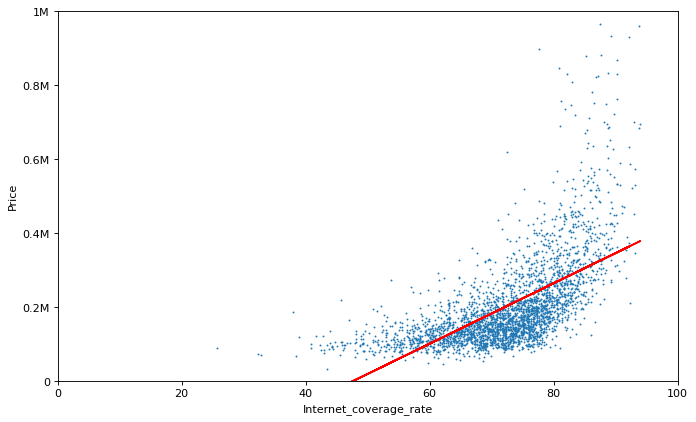

In [42]:
plotting("Internet_coverage_rate", xlim_max=100)
# These two variables show a positive relationship, but a linear fit may not be the best representation.
# The pattern resembles an exponential or quadratic curve, so we will apply a quadratic transformation for simplicity.

### (2) Price vs. Population

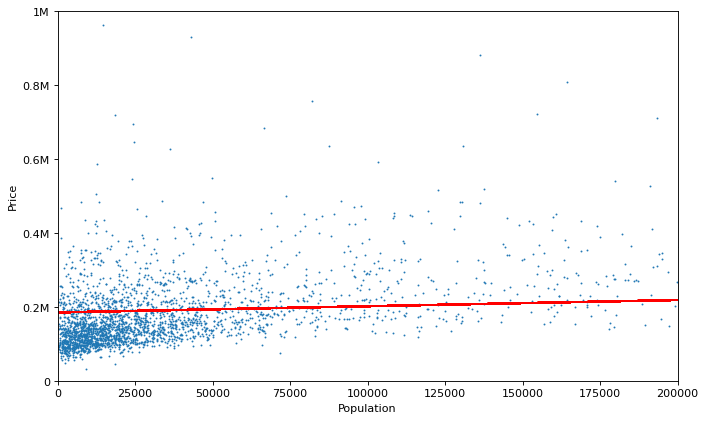

In [43]:
plotting('Population', xlim_max=200000)
# The plot shows a nearly flat line, suggesting that population may not strongly influence housing prices.
# This result is surprising, as it contradicts the common assumption that population affects housing demand and prices.

### (3) Price vs. Population Density

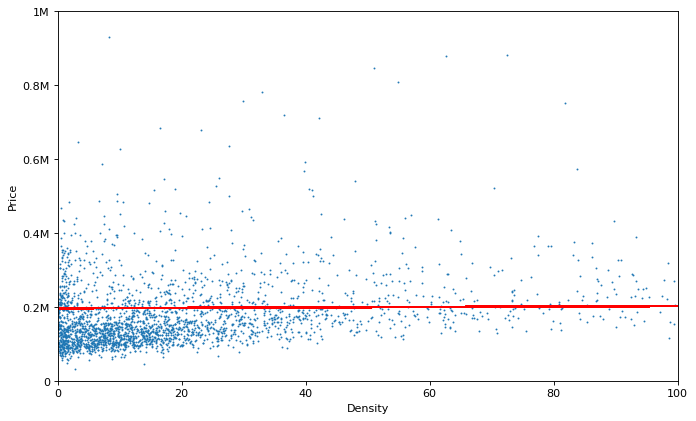

In [44]:
plotting('Density', xlim_max=100)
# The plot again shows a nearly flat line, indicating that population density may not have a significant effect on housing prices.
# This finding is surprising, as it challenges the common belief that higher population density increases housing demand and prices.

### (4) Price vs. Education

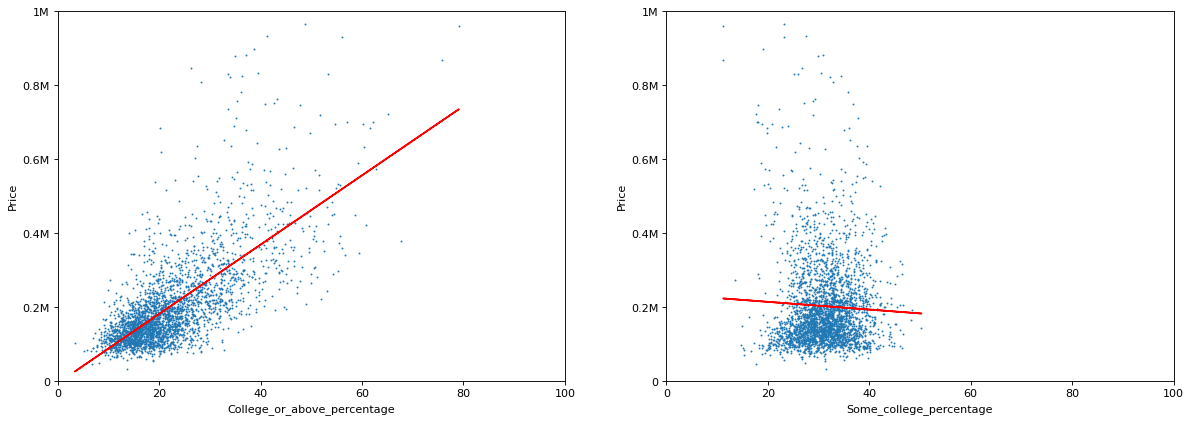

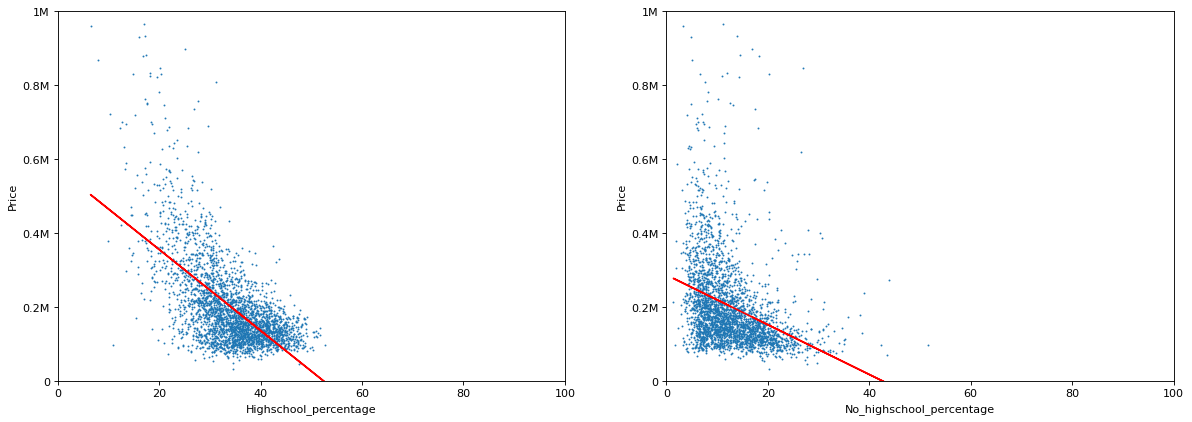

In [45]:
sub_plotting(['College_or_above_percentage', 'Some_college_percentage'])
sub_plotting(['Highschool_percentage', 'No_highschool_percentage'])
# The plots suggest a positive correlation between the percentage of college degrees in the population and housing prices.
# This indicates that higher education levels in the population are associated with higher housing prices.

### (5) Price vs. Races

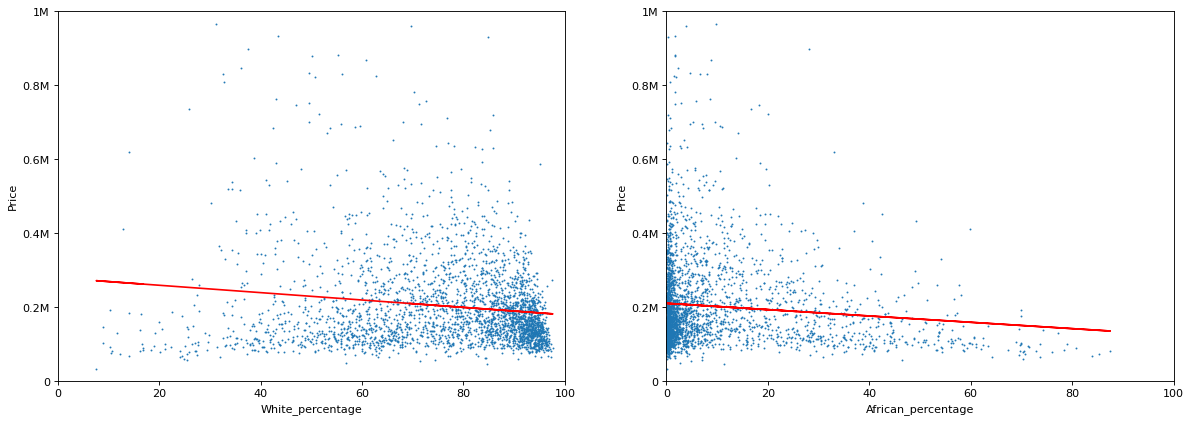

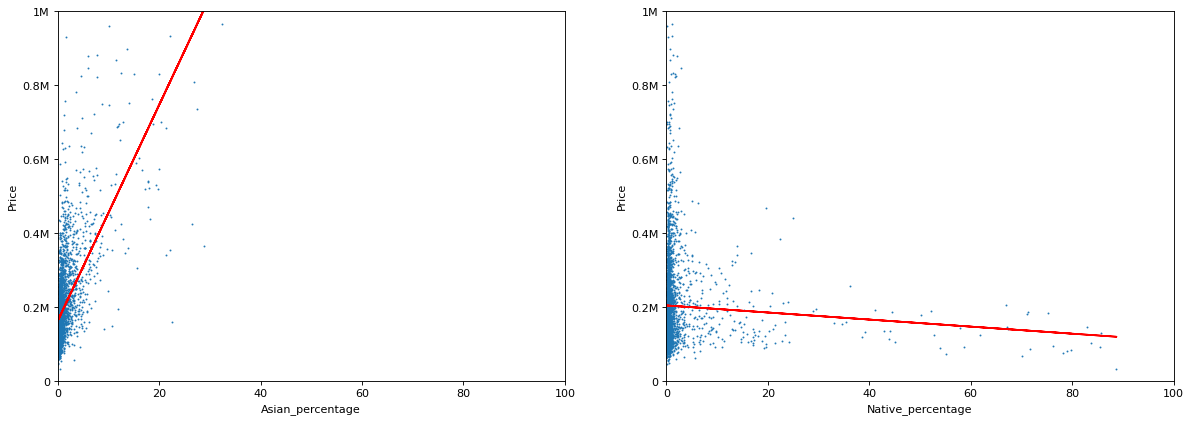

In [46]:
sub_plotting(['White_percentage', 'African_percentage'])
sub_plotting(['Asian_percentage', 'Native_percentage'])
# The relationships in these plots are more complex and less clear compared to the other variables.
# However, it is evident that areas with a higher percentage of Asian populations tend to have more expensive housing.

### (6) Price vs. Unemployment Rate

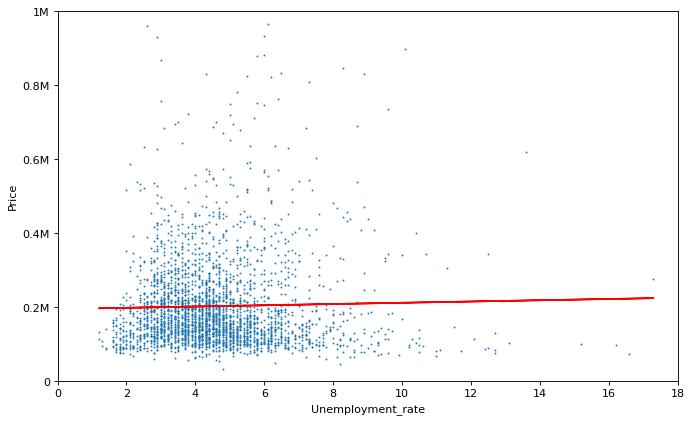

In [47]:
plotting('Unemployment_rate', xlim_max=18)
## as we see a nearly flat line, however, the data is certainly not modelable by a lienar relationshiip, it  is more of a quadratic relationship.

### (7) Price vs. Income

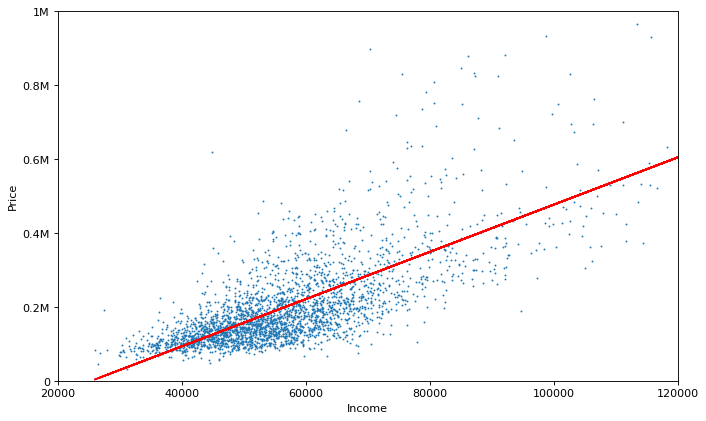

In [48]:
plotting('Income', xlim_min=20000, xlim_max=120000)
# The plot shows a strong positive relationship between income and housing prices.

### (8) Price vs. Median Age

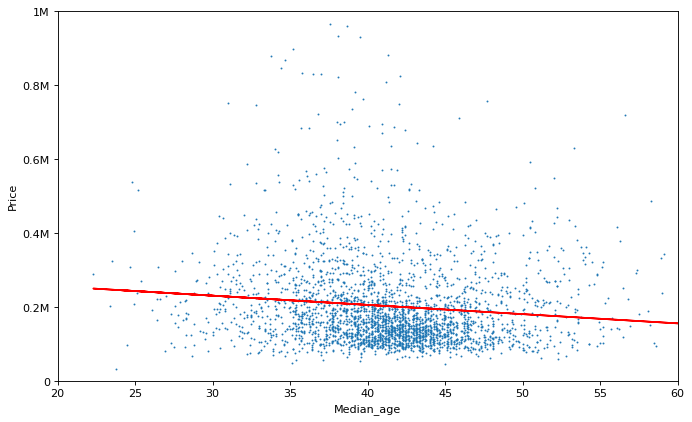

In [49]:
plotting('Median_age', xlim_min=20, xlim_max=60)
# As often suggested in econometrics, a quadratic transformation is a good approach when dealing with age as a variable.
# There appears to be a slight quadratic effect for age, though not very strong, but we will still apply the quadratic transformation.

### (8) Price vs. Crime_rate

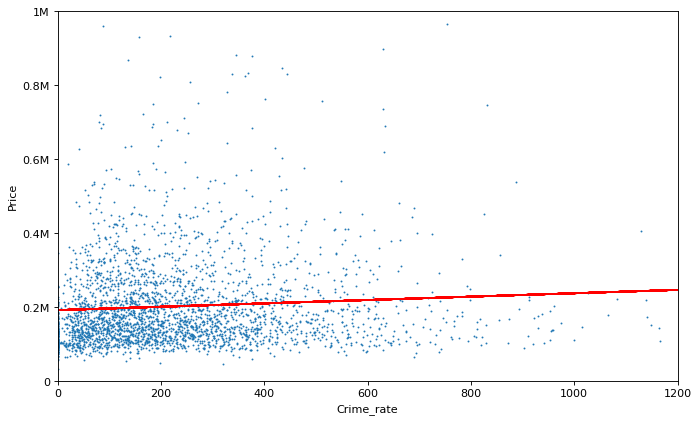

In [50]:
plotting('Crime_rate', xlim_min=0, xlim_max=1200)
# A slight positive relationship is observed, which is surprising as it contradicts the common belief that higher crime rates lower housing prices.

## PART 3: Regression and Analysis

In [51]:
# While a linear model works for most variables, Internet_coverage_rate, Unemployment_rate, and Median_age show clear non-linear relationships with housing prices.
# Therefore, we apply a quadratic transformation to these variables:
Housing_all['Internet_coverage_rate^2'] = Housing_all['Internet_coverage_rate'].pow(2)
Housing_all['Unemployment_rate^2'] = Housing_all['Unemployment_rate'].pow(2)
Housing_all['Median_age^2'] = Housing_all['Median_age'].pow(2)

# Perform linear regression using statsmodels:
Y = Housing_all['Price']
X = Housing_all[['Internet_coverage_rate', 'Internet_coverage_rate^2', 'Population', 'Density', 'College_or_above_percentage', 'Asian_percentage', 'Unemployment_rate', 'Unemployment_rate^2', 'Income', 'Median_age', 'Median_age^2','Crime_rate']]

X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     569.7
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:59:28   Log-Likelihood:                -37140.
No. Observations:                2954   AIC:                         7.431e+04
Df Residuals:                    2941   BIC:                         7.438e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Explanation of the Model and Adjustment

<b>1: </b> The F-statistic evaluates the combined effect of all the independent variables. In this case, with an F-statistic of 0.00, the model is statistically significant overall, indicating that the variables collectively provide meaningful insight into housing prices.

<b>2: </b> The R-squared value indicates the proportion of variance in the dependent variable (housing prices) explained by the independent variables. With an R-squared of 0.699, the model explains 69.9% of the variance, which is quite good, suggesting that the chosen variables capture substantial information about housing prices.

<b>3: </b> All variables are statistically significant, with p-values below the 1% threshold, confirming their strong contribution to the model.

In [52]:
# Save a left join version since we can bear some missing value in downstream usage.
Housing_all = sqldf(
"""
SELECT 
Name_Price.Name AS Name, 
Name_Price.Price As Price, 
Name_Internet.Internet_coverage_rate AS Internet_coverage_rate, 
Name_Population.Population As Population,
Name_Density.Density As Density,
Name_Education.College_or_above_percentage As College_or_above_percentage,
Name_Education.Some_college_percentage As Some_college_percentage,
Name_Education.Highschool_percentage As Highschool_percentage,
Name_Education.No_highschool_percentage As No_highschool_percentage,
Name_Races.White_percentage AS White_percentage, 
Name_Races.African_percentage AS African_percentage, 
Name_Races.Asian_percentage AS Asian_percentage, 
Name_Races.Native_percentage AS Native_percentage, 
Name_Unemployment.Unemployment_rate AS Unemployment_rate, 
Name_Income.Income AS Income,
Name_Age.Median_age AS Median_age,
Name_Crime.Crime_rate AS Crime_rate

FROM Name_Price

LEFT JOIN Name_Internet
ON Name_Price.Name = Name_Internet.Name

LEFT JOIN Name_Population
ON Name_Price.Name = Name_Population.Name

LEFT JOIN Name_Density
ON Name_Price.Name = Name_Density.Name

LEFT JOIN Name_Education
ON Name_Price.Name = Name_Education.Name

LEFT JOIN Name_Races
ON Name_Price.Name = Name_Races.Name

LEFT JOIN Name_Unemployment
ON Name_Price.Name = Name_Unemployment.Name

LEFT JOIN Name_Income
ON Name_Price.Name = Name_Income.Name

LEFT JOIN Name_Age
ON Name_Price.Name = Name_Age.Name

LEFT JOIN Name_Crime
ON Name_Price.Name = Name_Crime.Name



ORDER BY Name_Price.Name

""")
Housing_all.to_csv(r'C:\Users\siche\Desktop\projects\us_housing\modified_data\Housing_all.csv')
Housing_all

,Name,Price,Internet_coverage_rate,Population,Density,College_or_above_percentage,Some_college_percentage,Highschool_percentage,No_highschool_percentage,White_percentage,African_percentage,Asian_percentage,Native_percentage,Unemployment_rate,Income,Median_age,Crime_rate
0,"Abbeville County, South Carolina",127500.0,65.700001,24299.0,19.372405,18.3,29.1,35.4,17.1,69.47,25.54,0.30,0.18,4.5,47219.0,44.3,511.856680
1,"Acadia Parish, Louisiana",146460.0,70.899999,57288.0,36.872362,15.2,23.1,42.4,19.3,77.25,17.35,0.28,0.26,4.9,45183.0,36.7,163.976593
2,"Accomack County, Virginia",213440.0,63.800001,33246.0,28.135968,19.7,25.9,36.8,17.5,60.64,25.95,0.76,0.89,4.3,44127.0,45.9,190.056715
3,"Ada County, Idaho",475510.0,81.200004,511931.0,163.707537,40.1,34.4,20.8,4.7,82.89,1.63,2.81,0.66,3.3,73324.0,37.0,206.500442
4,"Adair County, Iowa",130430.0,71.999997,7541.0,4.831782,19.5,34.9,40.7,5.0,95.37,0.61,0.31,0.25,3.1,55265.0,45.4,66.916488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,"Yuma County, Arizona",216090.0,76.300001,206990.0,14.552702,15.4,32.5,26.6,25.4,44.30,2.01,1.27,1.73,12.9,54278.0,34.6,346.419749
3115,"Yuma County, colorado",244590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3116,"Zapata County, Texas",112680.0,54.100001,13908.0,5.556724,12.2,21.9,30.6,35.3,39.03,0.13,0.12,0.48,12.1,39876.0,29.5,208.478110
3117,"Zavala County, Texas",75460.0,48.300001,9534.0,3.610128,12.4,28.3,35.0,24.3,47.55,0.92,0.20,0.77,12.7,34898.0,32.9,411.319513
